# Multiple Linear Regression

* The dataset contains 1,338 entries and 7 columns:
* age (int): Age of the individual.
* sex (object): Gender of the individual (male/female).
* bmi (float): Body Mass Index.
* children (int): Number of children/dependents.
* smoker (object): Smoking status (yes/no).
* region (object): Residential region (e.g., southwest, southeast).
* expenses (float): Medical expenses (target variable).

In [380]:
import pandas as pd

In [386]:
df = pd.read_csv("insurance.csv")

In [388]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [390]:
#convert categorical data into numerical data
df['sex'] =df['sex'].astype('category')
df['sex'] =df['sex'].cat.codes

In [392]:
df['smoker'] =df ['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes

In [394]:
df['region'] =df ['region'].astype('category')
df['region']=df['region'].cat.codes

In [396]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [398]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Define features and Target variable

In [401]:
X = df.drop(columns = 'expenses')  #Features
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [403]:
y = df['expenses'] #target variable
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

# Train Test Split

In [406]:
from sklearn.model_selection import train_test_split

In [408]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Import Linear Regression

In [411]:
from sklearn.linear_model import LinearRegression

In [413]:
# Train the linear regression model
model = LinearRegression()

In [415]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the model

In [418]:
c = model.intercept_
c

-11827.69024344086

In [420]:
m = model.coef_
m

array([  256.54688301,   -49.5556959 ,   329.03829593,   479.33098055,
       23399.22241438,  -276.24306229])

In [422]:
# predict on the train set
y_pred = model.predict(X_train)
y_pred

array([ 2069.03359585,  8141.36511348, 18755.9087006 ,  7870.74055918,
        6319.77323677,  2023.31256548, 26863.42450343, 14926.51215619,
       10495.85929889, 16242.86056466, 11725.99370507, 11281.93339827,
       39310.00037015,  5826.58193988, 12319.08622599,  3157.93965299,
       15407.40958383,  4638.61198466,  5019.75698033,  6017.49314695,
       15364.9402173 ,  8973.68891998,  8767.32720772, 34224.46402602,
        6693.75646855, 26942.08473102, 27280.87272357, 15486.58742309,
        8811.58410991, 34400.26712291, 10167.16501979,  3890.92199565,
       15617.85872463, 29573.33802913, 29452.02427532, 28118.40509054,
       10015.30321546, 33055.63888237,  3963.91622151, 25447.54101793,
        5661.55997897, 27993.48459099,  7049.83736756, 15106.48019776,
        2569.47001823, 35456.58856451, 15254.19868735,  3190.8761776 ,
        1785.54434704, 10139.73090613,  9948.63660039, 11220.24742389,
       16775.5017179 ,  4325.19567694,  1904.54981552,  4172.84106372,
      

In [424]:
import matplotlib.pyplot as plt

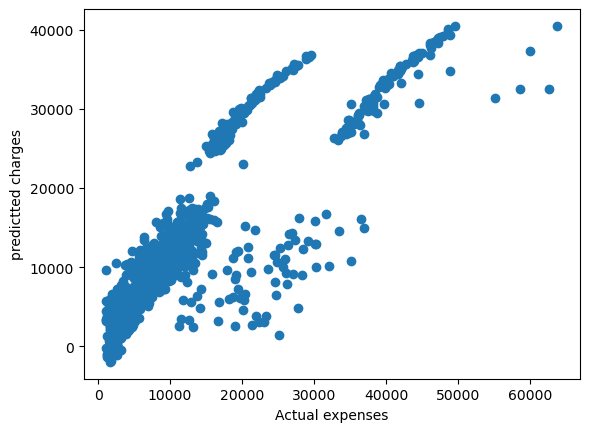

In [426]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual expenses')
plt.ylabel('predictted charges')
plt.show()

In [428]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.7306860719626136

In [430]:
#prediction on the test set
y_pred =model.predict(X_test)

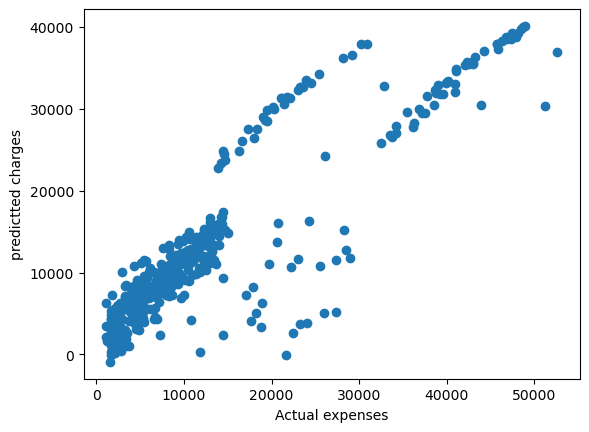

In [432]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual expenses')
plt.ylabel('predictted charges')
plt.show()

In [434]:
r2_score(y_test, y_pred)

0.791151983192236

# Coefficients Explanation
1. **256.55 (Sex: male):**

* Indicates that being male increases the predicted expenses by approximately $256.55 compared to the baseline (female), assuming all other variables are constant.
2. **-49.56 (Region: southeast):**

* Indicates that living in the southeast reduces the predicted expenses by approximately $49.56 compared to the baseline region (e.g., southwest), all else equal.
3. **329.04 (Region: northwest):**
  
* Indicates that living in the northwest increases the predicted expenses by approximately $329.04 compared to the baseline region.
4. **479.33 (Region: northeast):**

* Living in the northeast increases predicted expenses by approximately $479.33 compared to the baseline region.
5. **23399.22 (Smoker: yes):**

* Smoking increases predicted expenses by approximately $23,399.22 compared to non-smokers, making it the most significant contributor among the features.
6. **-276.24 (BMI):**

* Indicates that for each unit increase in BMI, the predicted expenses decrease by approximately $276.24. This is unexpected and could indicate multicollinearity or other confounding factors.


The value 0.7912 likely refers to the R-squared (R²) value of your multiple linear regression model.

## What is R-squared (R²)?
* R-squared measures the proportion of the variance in the dependent variable (here, expenses) that is explained by the independent variables (e.g., age, BMI, smoker, etc.) in the model.
* It ranges from 0 to 1:
  * 0: The model explains none of the variance.
  * 1: The model explains all the variance.
## Interpretation of 0.7912:
* An R² of 0.7912 means that 79.12% of the variation in medical expenses is explained by the features in the model.
* The remaining 20.88% is due to factors not included in the model or random noise.
